# Eight Queen

In [36]:
import random
import numpy
import matplotlib.pyplot as plt

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

import warnings
warnings.filterwarnings("ignore")

In [37]:
#Problem parameter
NB_QUEENS = 8

def evalNQueens(individual):
    size = len(individual)
    #Count the number of conflicts with other queens.
    #The conflicts can only be diagonal, count on each diagonal line
    left_diagonal = [0] * (2*size-1)
    right_diagonal = [0] * (2*size-1)

    #Sum the number of queens on each diagonal:
    for i in range(size):
        left_diagonal[i+individual[i]] += 1
        right_diagonal[size-1-i+individual[i]] += 1

    #Count the number of conflicts on each diagonal
    sum_ = 0
    for i in range(2*size-1):
        if left_diagonal[i] > 1:
            sum_ += left_diagonal[i] - 1
        if right_diagonal[i] > 1:
            sum_ += right_diagonal[i] - 1
    return sum_,

In [38]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

#Since there is only one queen per line, 
#individual are represented by a permutation
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)

#Structure initializers
#An individual is a list that represents the position of each queen.
#Only the line is stored, the column is the index of the number in the list.
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalNQueens)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2.0/NB_QUEENS)
toolbox.register("select", tools.selTournament, tournsize=3)


In [39]:
def main(seed=0):
    random.seed(seed)

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("Avg", numpy.mean)
    stats.register("Std", numpy.std)
    stats.register("Min", numpy.min)
    stats.register("Max", numpy.max)

    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats,
                        halloffame=hof, verbose=True)

    return pop, stats, hof

pop, stats, hof = main()

gen	nevals	Avg    	Std    	Min	Max
0  	300   	3.94333	1.25437	1  	9  
1  	176   	3.4    	1.23288	0  	7  
2  	149   	3.09667	1.20581	0  	7  
3  	181   	2.98333	1.32025	0  	7  
4  	175   	2.84   	1.35931	0  	7  
5  	163   	2.74   	1.48965	0  	7  
6  	204   	2.82   	1.51468	0  	7  
7  	183   	2.57667	1.48687	0  	7  
8  	170   	2.29333	1.46764	0  	6  
9  	186   	2.35333	1.51278	0  	7  
10 	176   	2.21667	1.63597	0  	8  
11 	170   	2      	1.7282 	0  	8  
12 	198   	1.94   	1.69009	0  	6  
13 	184   	1.68667	1.72099	0  	6  
14 	174   	1.3    	1.65429	0  	6  
15 	173   	0.953333	1.45756	0  	6  
16 	167   	0.996667	1.61555	0  	6  
17 	177   	0.82    	1.54087	0  	6  
18 	182   	0.666667	1.42439	0  	7  
19 	183   	0.62    	1.33502	0  	5  
20 	168   	0.583333	1.40821	0  	6  
21 	180   	0.603333	1.46492	0  	8  
22 	170   	0.546667	1.29916	0  	6  
23 	163   	0.456667	1.16681	0  	6  
24 	198   	0.573333	1.25351	0  	6  
25 	189   	0.523333	1.32519	0  	8  
26 	183   	0.54    	1.2813 	0  	6  
27 	177 

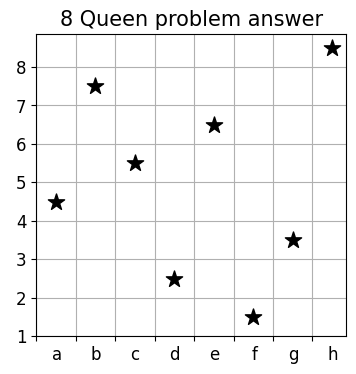

In [5]:
plt.figure(figsize=(4, 4), dpi = 100)
plt.scatter([i + 1.5 for i in range(8)], [i + 1.5 for i in hof[0]], marker = "*", color = "black", s = 150)
plt.xticks(range(1,9), ['        a', "        b", "        c","        d",
                        "        e", "        f", "        g", "        h"], size = '12')
plt.yticks(range(1,9), size = '12')
plt.title("8 Queen problem answer", fontsize = "15");
plt.grid();